In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from time import sleep
from scipy.stats import linregress
from pprint import pprint
import csv
import scipy.stats as st

In [2]:
# Study data files
physical_activity_path = "../../data/Physical_activity.csv"
suicide_path = "../../data/Suicide.csv"

In [3]:
# Read the data and store into Pandas DataFrame
physical_activity = pd.read_csv(physical_activity_path)

# Display the data table for preview
physical_activity.head()

,Year,LocationAbbr,Location,Question,Data_Value,Low_Confidence,High_Confidence,Sample_Size,Age(years),Gender,Race/Ethnicity
0,2020,US,National,Percent of adults who engage in no leisure-tim...,30.6,29.4,31.8,31255.0,NaN,NaN,Hispanic
1,2015,US,National,Percent of adults who achieve at least 300 min...,26.6,25.6,27.6,30904.0,NaN,NaN,NaN
2,2015,GU,Guam,Percent of adults who achieve at least 150 min...,27.4,18.6,38.5,125.0,NaN,NaN,Hispanic
3,2015,PR,Puerto Rico,Percent of adults who engage in no leisure-tim...,38.1,32.6,43.8,421.0,NaN,NaN,NaN
4,2015,GU,Guam,Percent of adults who engage in no leisure-tim...,30.5,25.8,35.6,559.0,NaN,NaN,NaN


In [4]:
# Read the data
suicide = pd.read_csv(suicide_path)

# Display the data table for preview
suicide.head()

,YEAR,STATE,RATE,DEATHS
0,2020,AL,16.0,793
1,2020,AK,27.5,204
2,2020,AZ,17.6,1363
3,2020,AR,19.0,583
4,2020,CA,10.0,4144


In [5]:
physical_activity = physical_activity.rename(columns={'YearEnd':'Year', 'LocationAbbr':'State'})

In [6]:
suicide = suicide.rename(columns={'YEAR':'Year', 'STATE':'State', 'RATE':'Suicide Rate'})

In [7]:
suicide_activity_df = pd.merge(suicide, physical_activity, on=["Year","State"], how="outer")
suicide
suicide_activity_df.head()

,Year,State,Suicide Rate,DEATHS,Location,Question,Data_Value,Low_Confidence,High_Confidence,Sample_Size,Age(years),Gender,Race/Ethnicity
0,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,34.6,31.4,38.1,1346.0,NaN,NaN,Non-Hispanic Black
1,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,22.5,18.6,26.9,576.0,25 - 34,NaN,NaN
2,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,45.9,40.0,51.8,487.0,NaN,NaN,NaN
3,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,24.2,14.1,38.5,79.0,NaN,NaN,2 or more races
4,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,34.7,31.7,37.7,1528.0,NaN,NaN,NaN


In [8]:
suicide_activity_2020_df = suicide_activity_df.loc[suicide_activity_df['Year'] == 2020]
suicide_activity_2020_df.head()

,Year,State,Suicide Rate,DEATHS,Location,Question,Data_Value,Low_Confidence,High_Confidence,Sample_Size,Age(years),Gender,Race/Ethnicity
0,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,34.6,31.4,38.1,1346.0,NaN,NaN,Non-Hispanic Black
1,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,22.5,18.6,26.9,576.0,25 - 34,NaN,NaN
2,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,45.9,40.0,51.8,487.0,NaN,NaN,NaN
3,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,24.2,14.1,38.5,79.0,NaN,NaN,2 or more races
4,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,34.7,31.7,37.7,1528.0,NaN,NaN,NaN


In [9]:
suicide_activity_2020_no_activity_df = suicide_activity_2020_df.loc[suicide_activity_2020_df['Question'] == "Percent of adults who engage in no leisure-time physical activity"]
suicide_activity_2020_no_activity_df.head()

,Year,State,Suicide Rate,DEATHS,Location,Question,Data_Value,Low_Confidence,High_Confidence,Sample_Size,Age(years),Gender,Race/Ethnicity
0,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,34.6,31.4,38.1,1346.0,NaN,NaN,Non-Hispanic Black
1,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,22.5,18.6,26.9,576.0,25 - 34,NaN,NaN
2,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,45.9,40.0,51.8,487.0,NaN,NaN,NaN
3,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,24.2,14.1,38.5,79.0,NaN,NaN,2 or more races
4,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,34.7,31.7,37.7,1528.0,NaN,NaN,NaN


In [10]:
Value_by_gender_2020 = suicide_activity_2020_no_activity_df[["Data_Value","Sample_Size","Gender","State"]]
Value_by_gender_2020.head()

,Data_Value,Sample_Size,Gender,State
0,34.6,1346.0,NaN,AL
1,22.5,576.0,NaN,AL
2,45.9,487.0,NaN,AL
3,24.2,79.0,NaN,AL
4,34.7,1528.0,NaN,AL


In [11]:
Value_by_gender_2020 = Value_by_gender_2020.dropna().set_index("State")
Value_by_gender_2020

,Data_Value,Sample_Size,Gender
State,,,
AL,25.2,2171.0,Male
AL,32.1,3165.0,Female
AK,24.7,1851.0,Female
AK,18.2,1810.0,Male
AZ,20.4,4755.0,Male
...,...,...,...
PR,39.8,1978.0,Male
GU,21.6,1017.0,Male
GU,30.2,1165.0,Female


In [12]:
Value_by_gender_2020["no_physical_activity"] = Value_by_gender_2020["Data_Value"] * Value_by_gender_2020["Sample_Size"] / 100
Value_by_gender_2020.head()

,Data_Value,Sample_Size,Gender,no_physical_activity
State,,,,
AL,25.2,2171.0,Male,547.092
AL,32.1,3165.0,Female,1015.965
AK,24.7,1851.0,Female,457.197
AK,18.2,1810.0,Male,329.420
AZ,20.4,4755.0,Male,970.020


In [13]:
total_people_2020 = Value_by_gender_2020.groupby("State")["Sample_Size","no_physical_activity"].sum()
total_people_2020.head()

C:\Users\MishkisPCDell\AppData\Local\Temp\ipykernel_7072\3609015436.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_people_2020 = Value_by_gender_2020.groupby("State")["Sample_Size","no_physical_activity"].sum()


,Sample_Size,no_physical_activity
State,,
AK,3661.0,786.617
AL,5336.0,1563.057
AR,5231.0,1586.524
AZ,10276.0,2311.623
CA,4797.0,1017.825


In [14]:
avg_no_physical_activity_2020 = total_people_2020["no_physical_activity"] / total_people_2020["Sample_Size"] * 100

total_people_2020["avg_physical_activity"] = avg_no_physical_activity_2020

total_people_2020.head()



,Sample_Size,no_physical_activity,avg_physical_activity
State,,,
AK,3661.0,786.617,21.486397
AL,5336.0,1563.057,29.292672
AR,5231.0,1586.524,30.329268
AZ,10276.0,2311.623,22.495358
CA,4797.0,1017.825,21.217949


In [15]:
suicide_2020 = suicide.loc[suicide['Year'] == 2020]
suicide_2020
merged_suicide_activity_2020_df = pd.merge(suicide_2020, total_people_2020, on=["State"], how="outer")
#merged_suicide_activity_2020_df["Year"] =merged_suicide_activity_2020_df["Year"].map("{:,}".format)

merged_suicide_activity_2020_df


,Year,State,Suicide Rate,DEATHS,Sample_Size,no_physical_activity,avg_physical_activity
0,2020.0,AL,16.0,793,5336.0,1563.057,29.292672
1,2020.0,AK,27.5,204,3661.0,786.617,21.486397
2,2020.0,AZ,17.6,1363,10276.0,2311.623,22.495358
3,2020.0,AR,19.0,583,5231.0,1586.524,30.329268
4,2020.0,CA,10.0,4144,4797.0,1017.825,21.217949
5,2020.0,CO,21.5,1302,10173.0,1696.255,16.674088
6,2020.0,CT,9.3,364,8965.0,1852.968,20.668912
7,2020.0,DE,12.3,124,4021.0,997.621,24.810271
8,2020.0,FL,13.2,3135,11781.0,3179.799,26.990909
9,2020.0,GA,13.7,1491,9068.0,2276.535,25.105150


In [16]:
merged_suicide_activity_2020_df = merged_suicide_activity_2020_df.dropna()
merged_suicide_activity_2020_df

,Year,State,Suicide Rate,DEATHS,Sample_Size,no_physical_activity,avg_physical_activity
0,2020.0,AL,16.0,793,5336.0,1563.057,29.292672
1,2020.0,AK,27.5,204,3661.0,786.617,21.486397
2,2020.0,AZ,17.6,1363,10276.0,2311.623,22.495358
3,2020.0,AR,19.0,583,5231.0,1586.524,30.329268
4,2020.0,CA,10.0,4144,4797.0,1017.825,21.217949
5,2020.0,CO,21.5,1302,10173.0,1696.255,16.674088
6,2020.0,CT,9.3,364,8965.0,1852.968,20.668912
7,2020.0,DE,12.3,124,4021.0,997.621,24.810271
8,2020.0,FL,13.2,3135,11781.0,3179.799,26.990909
9,2020.0,GA,13.7,1491,9068.0,2276.535,25.105150


Text(0, 0.5, 'Suicide rate')

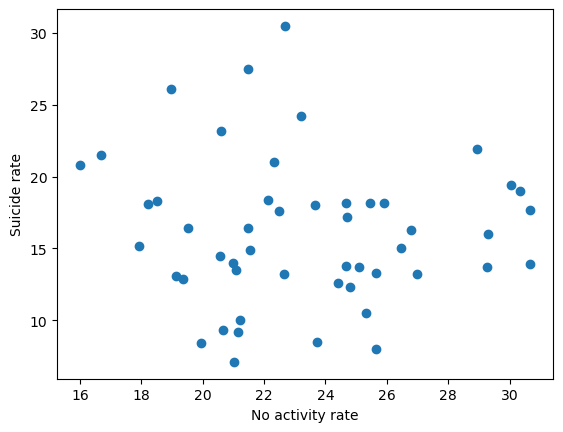

In [17]:
# Generate a scatter plot
suicide_rate = merged_suicide_activity_2020_df["Suicide Rate"]
no_activity_rate = merged_suicide_activity_2020_df["avg_physical_activity"]
plt.scatter(no_activity_rate, suicide_rate)
plt.xlabel('No activity rate')
plt.ylabel('Suicide rate')

The r-value is: 0.0032854599497961602


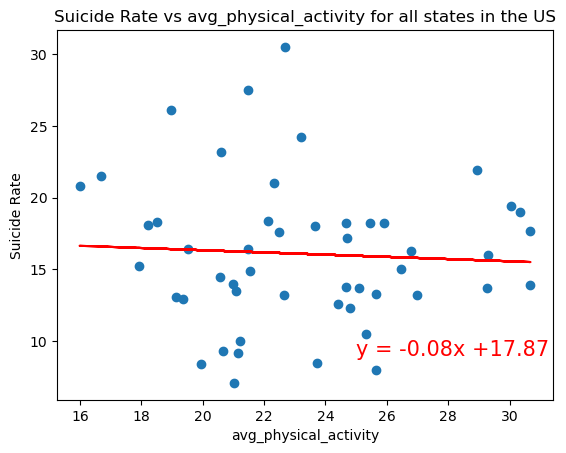

In [19]:
def linear_regression(df, x_col_name, y_col_name, coord):

    # Define a function to create Linear Regression plots
    x_values = df[x_col_name]
    y_values = df[y_col_name]

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Label plot and annotate the line equation
    plt.xlabel(x_col_name)
    plt.ylabel(y_col_name)
    plt.title(f"{y_col_name} vs {x_col_name} for all states in the US")
    plt.annotate(line_eq, coord, fontsize=15,color="red")

    # Print r value
    print(f"The r-value is: {rvalue**2}")

    # Show plot
    plt.show()

# Linear regression 
# Perform a linear regression on suicide rate vs no activity rate
linear_regression(merged_suicide_activity_2020_df , "avg_physical_activity", "Suicide Rate", (25,9))